### Runtime: Eigendecomposition of a Tridiagonal Matrix

In [1]:
import torch
import time
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
def create_random_tridiagonal_matrix(size):
    """ 
    create a random tridiagonal matrix of size `size` x `size`.
    """
    T = torch.zeros(size, size).to(device)
    alpha_list = torch.randn(size)
    beta_list = torch.randn(size)
    for i in range(size):
        T[i, i] = alpha_list[i]
        if i < size - 1:
            T[i, i + 1] = beta_list[i]
            T[i + 1, i] = beta_list[i]
    return T

In [4]:
sizes = [10, 10**2, 10**3, 10**4]
num_repeats = 5
run_times = dict()

In [5]:
if device == torch.device("cuda"):
    # GPU
    start = torch.cuda.Event(enable_timing=True)
    end = torch.cuda.Event(enable_timing=True)
    for size in sizes:
        run_times[size] = []
        for _ in range(num_repeats):
            T = create_random_tridiagonal_matrix(size).to(device)
            torch.cuda.synchronize()   
            start.record()
            _, _ = torch.linalg.eig(T)
            end.record()
            torch.cuda.synchronize()
            elapsed_time = start.elapsed_time(end)
            run_times[size].append(elapsed_time)
else:
    # CPU
    for size in sizes:
        run_times[size] = []
        for _ in tqdm(range(num_repeats)):
            T = create_random_tridiagonal_matrix(size)
            start = time.time()
            _, _ = torch.linalg.eig(T)
            end = time.time()
            elapsed_time = end - start
            run_times[size].append(elapsed_time) 

100%|██████████| 5/5 [08:55<00:00, 107.12s/it]


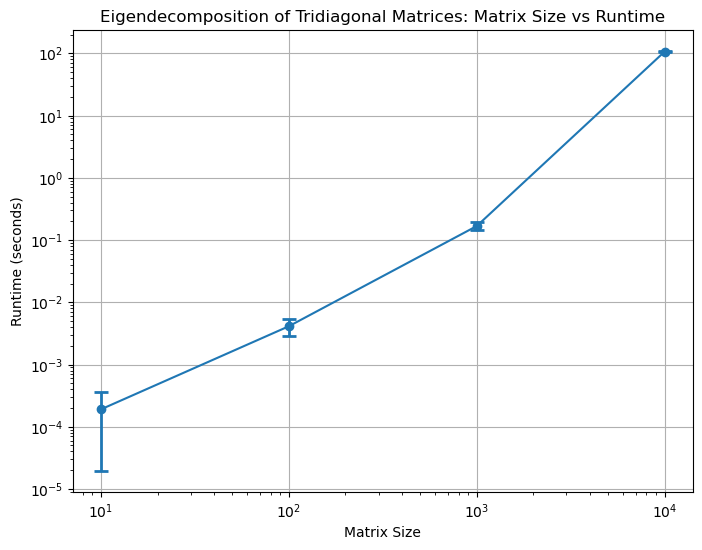

In [7]:
# plot the runtimes for different matrix sizes
mean_times = [np.mean(np.array(times)) for times in run_times.values()]
std_times = [np.std(np.array(times)) for times in run_times.values()]
plt.figure(figsize=(8, 6))
plt.errorbar(sizes, mean_times, yerr=std_times, fmt='-o', capsize=5, capthick=2, elinewidth=2)
plt.xticks(ticks=sizes, labels=[str(size) for size in sizes])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Matrix Size')
plt.ylabel('Runtime (seconds)')
plt.title('Eigendecomposition of Tridiagonal Matrices: Matrix Size vs Runtime')
plt.grid(True)
plt.show()